In [10]:
import torch
import torch_geometric
import torch_geometric.nn as pyg_nn
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Twitch, GitHub, GNNBenchmarkDataset
import networkx as nkx

from common import train_model, eval_model, plot_hist

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model

In [2]:
class GatClassifier(nn.Module):
    def __init__(self, input_features: int, hid:int):
        super().__init__()
        self.conv1 = pyg_nn.GATConv(input_features, hid, dropout=0.5)
        self.conv2 = pyg_nn.GATConv(hid, out_channels=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return torch.sigmoid(x)

# Training

In [4]:
github = GitHub('../data/GitHub')
github.data

Data(x=[37700, 128], edge_index=[2, 578006], y=[37700])

In [11]:
from torch_geometric.transforms import RandomNodeSplit
torch.manual_seed(84)

model = GatClassifier(github.num_features, hid=16).to(DEVICE)
data = RandomNodeSplit()(github.data.to(DEVICE))
data.y = data.y.to(torch.float32) # for loss computation
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-4)
loss = nn.BCELoss()
eval_frequency = 100

train_hist = train_model(model, loss, optimizer, data, epochs=1500, eval_freq=eval_frequency, device=DEVICE)

  1%|          | 9/1500 [00:00<00:34, 43.67it/s]


epoch 0:
tr_loss 0.7796
tr_acc: 0.3480                                 
val_acc: 0.3640


  7%|▋         | 110/1500 [00:02<00:29, 46.75it/s]


epoch 100:
tr_loss 0.3983
tr_acc: 0.8403                                 
val_acc: 0.8580


 14%|█▎        | 205/1500 [00:04<00:28, 45.06it/s]


epoch 200:
tr_loss 0.3547
tr_acc: 0.8559                                 
val_acc: 0.8760


 20%|██        | 307/1500 [00:06<00:25, 45.96it/s]


epoch 300:
tr_loss 0.3425
tr_acc: 0.8598                                 
val_acc: 0.8800


 27%|██▋       | 407/1500 [00:08<00:23, 46.93it/s]


epoch 400:
tr_loss 0.3350
tr_acc: 0.8636                                 
val_acc: 0.8840


 34%|███▍      | 509/1500 [00:11<00:20, 47.24it/s]


epoch 500:
tr_loss 0.3292
tr_acc: 0.8652                                 
val_acc: 0.8900


 41%|████      | 610/1500 [00:13<00:18, 47.01it/s]


epoch 600:
tr_loss 0.3243
tr_acc: 0.8665                                 
val_acc: 0.8880


 47%|████▋     | 710/1500 [00:15<00:17, 46.43it/s]


epoch 700:
tr_loss 0.3204
tr_acc: 0.8677                                 
val_acc: 0.8900


 54%|█████▍    | 807/1500 [00:17<00:14, 46.42it/s]


epoch 800:
tr_loss 0.3176
tr_acc: 0.8690                                 
val_acc: 0.8880


 61%|██████    | 908/1500 [00:19<00:13, 44.13it/s]


epoch 900:
tr_loss 0.3154
tr_acc: 0.8701                                 
val_acc: 0.8920


 67%|██████▋   | 1008/1500 [00:21<00:10, 45.80it/s]


epoch 1000:
tr_loss 0.3136
tr_acc: 0.8712                                 
val_acc: 0.8900


 74%|███████▎  | 1103/1500 [00:24<00:09, 44.05it/s]


epoch 1100:
tr_loss 0.3119
tr_acc: 0.8719                                 
val_acc: 0.8880


 81%|████████  | 1209/1500 [00:26<00:06, 44.41it/s]


epoch 1200:
tr_loss 0.3102
tr_acc: 0.8718                                 
val_acc: 0.8840


 87%|████████▋ | 1309/1500 [00:28<00:04, 44.81it/s]


epoch 1300:
tr_loss 0.3088
tr_acc: 0.8727                                 
val_acc: 0.8860


 94%|█████████▎| 1406/1500 [00:31<00:02, 40.85it/s]


epoch 1400:
tr_loss 0.3075
tr_acc: 0.8730                                 
val_acc: 0.8860


100%|██████████| 1500/1500 [00:33<00:00, 44.70it/s]


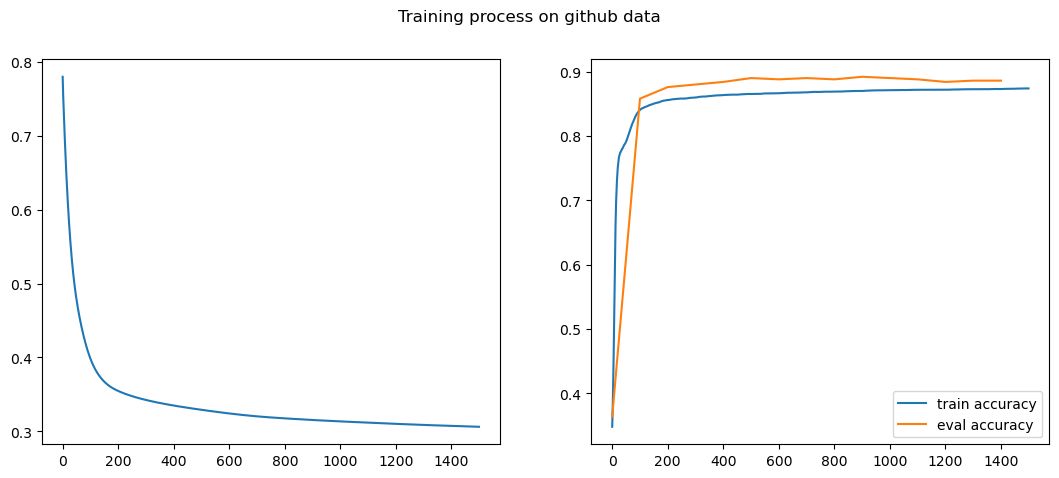

In [12]:
plot_hist(*train_hist, eval_frequency)

In [14]:
twitch = Twitch(root='../data/Twitch', name='EN')
twitch.data

Processing...
Done!


Data(x=[7126, 128], edge_index=[2, 77774], y=[7126])

In [15]:
from torch_geometric.transforms import RandomNodeSplit
torch.manual_seed(84)

model = GatClassifier(twitch.num_features, hid=16).to(DEVICE)
data = RandomNodeSplit()(twitch.data.to(DEVICE))
data.y = data.y.to(torch.float32) # for loss computation
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-4)
loss = nn.BCELoss()
eval_frequency = 100

train_hist = train_model(model, loss, optimizer, data, epochs=1500, eval_freq=eval_frequency, device=DEVICE)

  1%|          | 16/1500 [00:00<00:18, 80.81it/s]


epoch 0:
tr_loss 0.7392
tr_acc: 0.4865                                 
val_acc: 0.4820


  7%|▋         | 110/1500 [00:01<00:16, 86.09it/s]


epoch 100:
tr_loss 0.6575
tr_acc: 0.6102                                 
val_acc: 0.5740


 15%|█▍        | 218/1500 [00:02<00:14, 87.99it/s]


epoch 200:
tr_loss 0.6318
tr_acc: 0.6397                                 
val_acc: 0.5820


 21%|██        | 312/1500 [00:03<00:13, 84.92it/s]


epoch 300:
tr_loss 0.6145
tr_acc: 0.6539                                 
val_acc: 0.5700


 28%|██▊       | 417/1500 [00:04<00:12, 89.56it/s]


epoch 400:
tr_loss 0.5987
tr_acc: 0.6740                                 
val_acc: 0.5700


 34%|███▍      | 512/1500 [00:05<00:11, 83.03it/s]


epoch 500:
tr_loss 0.5800
tr_acc: 0.6932                                 
val_acc: 0.5660


 40%|████      | 607/1500 [00:07<00:11, 80.60it/s]


epoch 600:
tr_loss 0.5589
tr_acc: 0.7128                                 
val_acc: 0.5580


 47%|████▋     | 709/1500 [00:08<00:09, 84.99it/s]


epoch 700:
tr_loss 0.5347
tr_acc: 0.7309                                 
val_acc: 0.5620


 54%|█████▍    | 808/1500 [00:09<00:08, 84.84it/s]


epoch 800:
tr_loss 0.5104
tr_acc: 0.7524                                 
val_acc: 0.5580


 61%|██████    | 911/1500 [00:10<00:06, 89.53it/s]


epoch 900:
tr_loss 0.4874
tr_acc: 0.7648                                 
val_acc: 0.5420


 68%|██████▊   | 1017/1500 [00:11<00:06, 80.12it/s]


epoch 1000:
tr_loss 0.4684
tr_acc: 0.7812                                 
val_acc: 0.5420


 74%|███████▍  | 1113/1500 [00:12<00:04, 87.45it/s]


epoch 1100:
tr_loss 0.4519
tr_acc: 0.7931                                 
val_acc: 0.5520


 81%|████████  | 1210/1500 [00:14<00:03, 81.49it/s]


epoch 1200:
tr_loss 0.4364
tr_acc: 0.8057                                 
val_acc: 0.5460


 88%|████████▊ | 1316/1500 [00:15<00:02, 88.92it/s]


epoch 1300:
tr_loss 0.4226
tr_acc: 0.8159                                 
val_acc: 0.5500


 94%|█████████▍| 1410/1500 [00:16<00:01, 81.40it/s]


epoch 1400:
tr_loss 0.4092
tr_acc: 0.8263                                 
val_acc: 0.5440


100%|██████████| 1500/1500 [00:17<00:00, 86.66it/s]
